<a href="https://colab.research.google.com/github/DariaSemenova7/myprojecs/blob/main/%D0%91%D0%B0%D0%BD%D0%BA%D1%80%D0%BE%D1%82%D1%81%D1%82%D0%B2%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Были выбраны данные по банкротству компаний из [kaggle](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction) <br>
Цель - спрогнозировать банкротство компаний в зависимости от финансовых показателей

In [ ]:
#Базовые пакеты
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Логистическая регрессия
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm
from statsmodels.discrete.discrete_model import Probit
#Наивный баес
from sklearn.naive_bayes import GaussianNB
#Деревья решений
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Лес
from sklearn.ensemble import RandomForestClassifier
#Градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier
#Качество моделей( пример как НЕ вежливо грузить модули, так можно, но лучше по 1)
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score
import plotly.express as px
import plotly.graph_objects as go

# 1. Импорт и анализ данных

In [ ]:
df=pd.read_csv('data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
exam = df.iloc[:,[0,1, 90, 33, 57, 49, 93, 91, 48, 46, 73]]
exam.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,Net Income to Stockholder's Equity,Current Ratio,Cash/Total Assets,Fixed Assets Turnover Frequency,Interest Coverage Ratio (Interest expense to EBIT),Liability to Equity,Inventory Turnover Rate (times),Accounts Receivable Turnover,Working capitcal Turnover Rate
0,1,0.370594,0.827890,0.002259,0.004094,1.165007e-04,0.564050,0.290202,1.820926e-04,0.001814,0.593831
1,1,0.464291,0.839969,0.006016,0.014948,7.190000e+08,0.570175,0.283846,9.360000e+09,0.001286,0.593916
2,1,0.426071,0.836774,0.011543,0.000991,2.650000e+09,0.563706,0.290189,6.500000e+07,0.001495,0.594502
3,1,0.399844,0.834697,0.004194,0.018851,9.150000e+09,0.564663,0.281721,7.130000e+09,0.001966,0.593889
4,1,0.465022,0.839973,0.006022,0.014161,2.935211e-04,0.575617,0.278514,1.633674e-04,0.001449,0.593915


In [ ]:
exam.isnull().sum()
# пропущенных переменных нет

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Net Income to Stockholder's Equity                         0
 Current Ratio                                              0
 Cash/Total Assets                                          0
 Fixed Assets Turnover Frequency                            0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Liability to Equity                                        0
 Inventory Turnover Rate (times)                            0
 Accounts Receivable Turnover                               0
 Working capitcal Turnover Rate                             0
dtype: int64

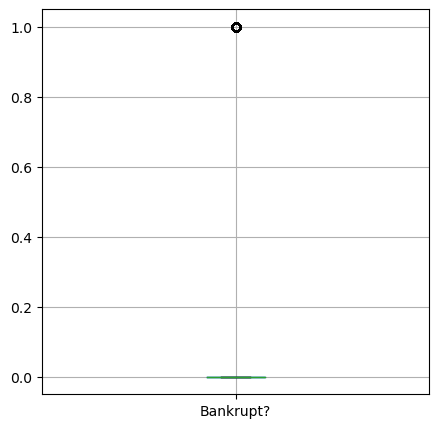

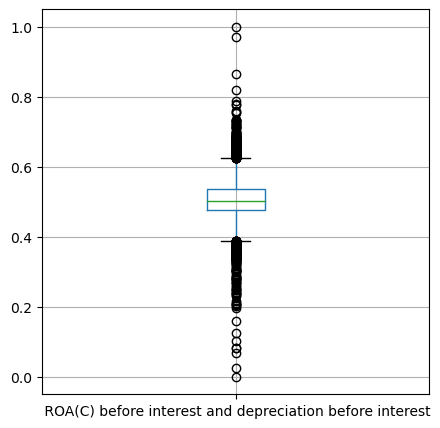

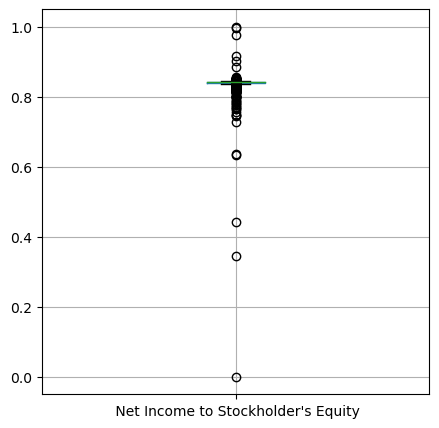

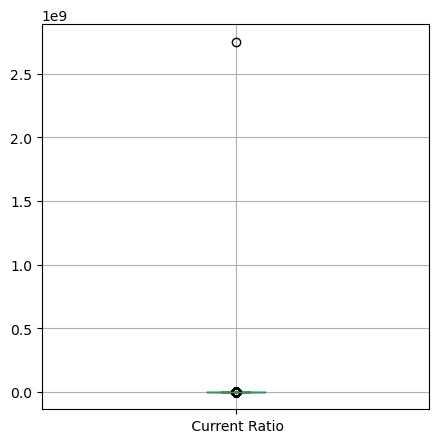

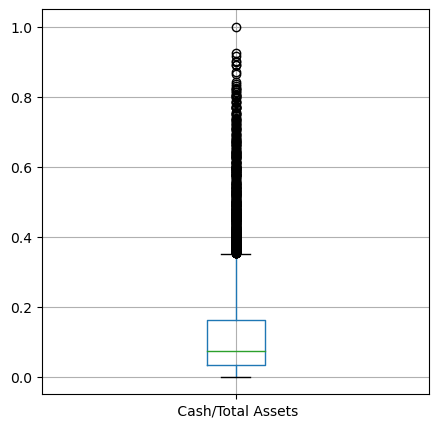

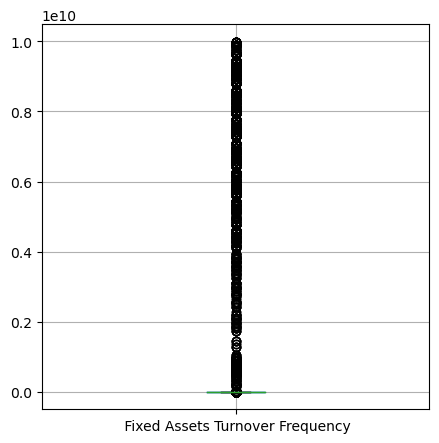

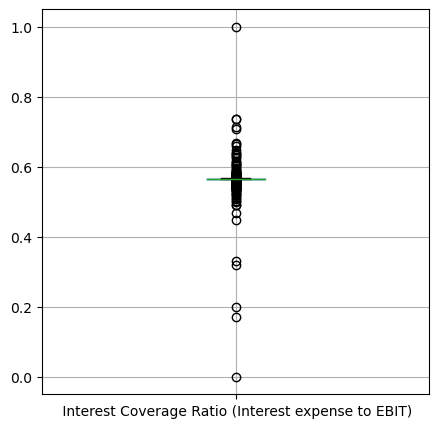

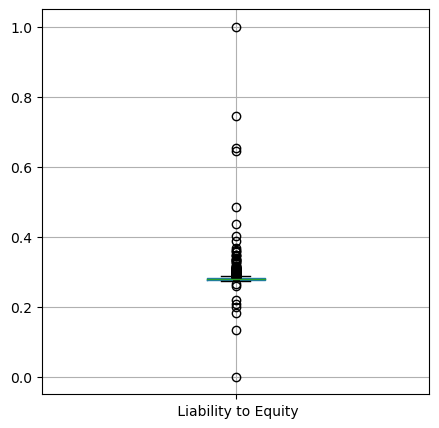

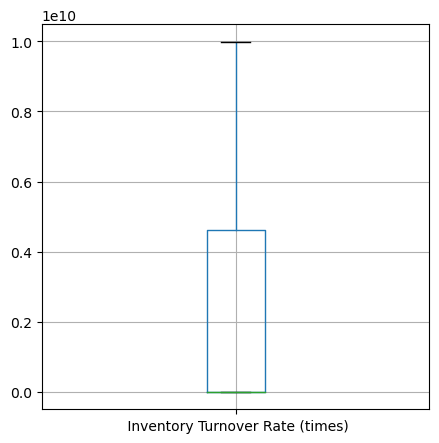

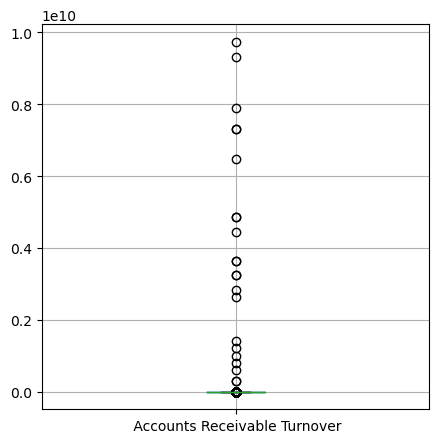

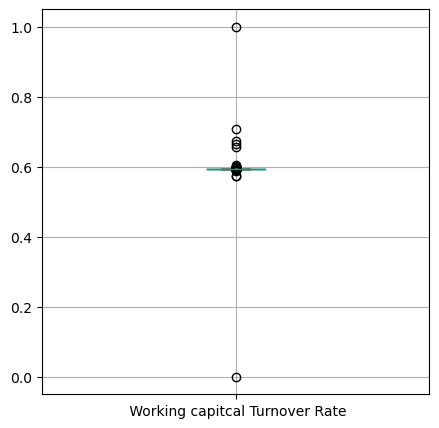

In [ ]:
for x in exam:
    exam.boxplot(figsize=(5,5),column=x)
    plt.show()
# есть выбросы во всех переменных

In [ ]:
exam.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' Net Income to Stockholder's Equity', ' Current Ratio',
       ' Cash/Total Assets', ' Fixed Assets Turnover Frequency',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Liability to Equity', ' Inventory Turnover Rate (times)',
       ' Accounts Receivable Turnover', ' Working capitcal Turnover Rate'],
      dtype='object')

In [ ]:
exam.columns=['Bankrupt', 'ROA', 'ROE', 'CurrRatio', 'CashTA', 'FATF', 'ICR', 'LE', 'InvTurnRate', 'ART', 'WCTR']

In [ ]:
# Создание новой таблицы с копированием первого столбца
exam_log = exam.iloc[:, 1:]

# Прологарифмирование всех остальных столбцов
for col in exam_log.columns:
    exam_log[col] = np.where(exam_log[col]==0,0,np.log(exam_log[col]))
exam_log.head()

C:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,ROA,ROE,CurrRatio,CashTA,FATF,ICR,LE,InvTurnRate,ART,WCTR
0,-0.992647,-0.188875,-6.092849,-5.498134,-9.057614,-0.572612,-1.237178,-8.610995,-6.312285,-0.521161
1,-0.767244,-0.174390,-5.113298,-4.203196,20.393372,-0.561812,-1.259324,22.959711,-6.655942,-0.521018
2,-0.853149,-0.178201,-4.461715,-6.916852,21.697825,-0.573222,-1.237224,17.989898,-6.505403,-0.520031
3,-0.916681,-0.180686,-5.474086,-3.971209,22.937020,-0.571525,-1.266837,22.687577,-6.231726,-0.521063
4,-0.765670,-0.174386,-5.112262,-4.257265,-8.133561,-0.552313,-1.278288,-8.719509,-6.537108,-0.521019


In [ ]:
exam_log["Bankrupt"]=exam["Bankrupt"]

In [ ]:
exam_log.head()

,ROA,ROE,CurrRatio,CashTA,FATF,ICR,LE,InvTurnRate,ART,WCTR,Bankrupt
0,-0.992647,-0.188875,-6.092849,-5.498134,-9.057614,-0.572612,-1.237178,-8.610995,-6.312285,-0.521161,1
1,-0.767244,-0.174390,-5.113298,-4.203196,20.393372,-0.561812,-1.259324,22.959711,-6.655942,-0.521018,1
2,-0.853149,-0.178201,-4.461715,-6.916852,21.697825,-0.573222,-1.237224,17.989898,-6.505403,-0.520031,1
3,-0.916681,-0.180686,-5.474086,-3.971209,22.937020,-0.571525,-1.266837,22.687577,-6.231726,-0.521063,1
4,-0.765670,-0.174386,-5.112262,-4.257265,-8.133561,-0.552313,-1.278288,-8.719509,-6.537108,-0.521019,1


In [ ]:
exam_log.isnull().sum()

ROA            0
ROE            0
CurrRatio      0
CashTA         0
FATF           0
ICR            0
LE             0
InvTurnRate    0
ART            0
WCTR           0
Bankrupt       0
dtype: int64

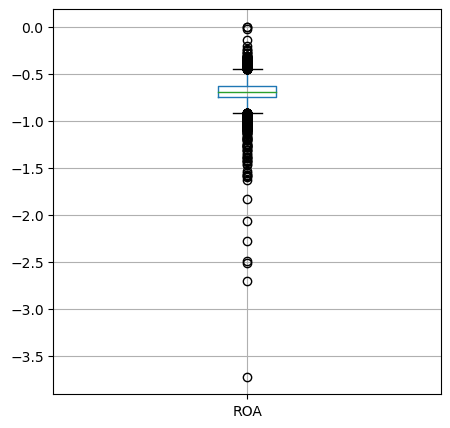

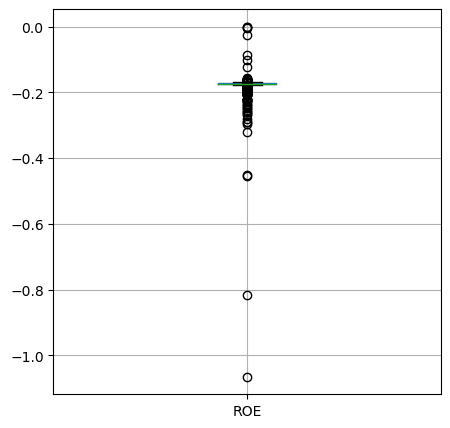

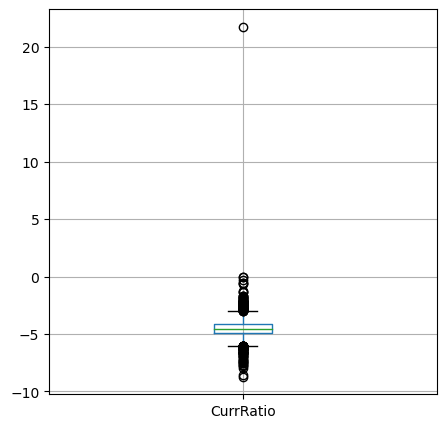

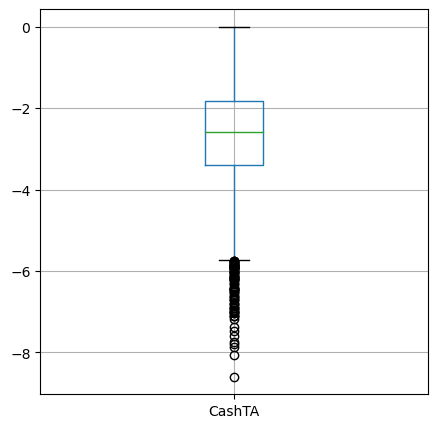

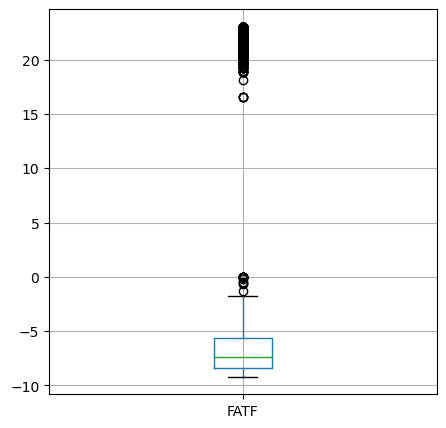

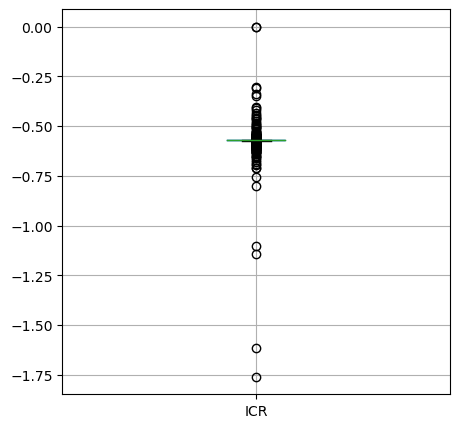

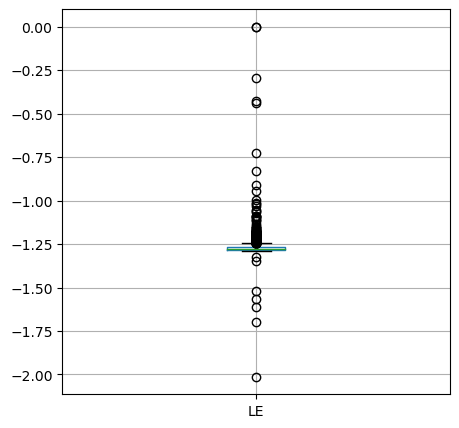

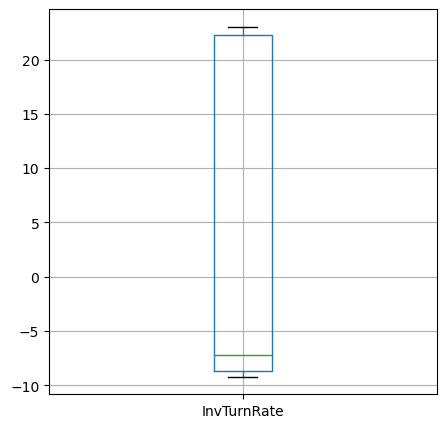

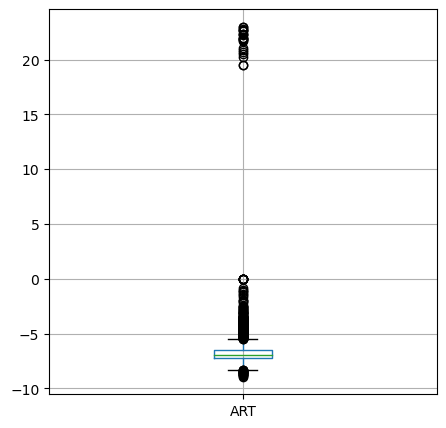

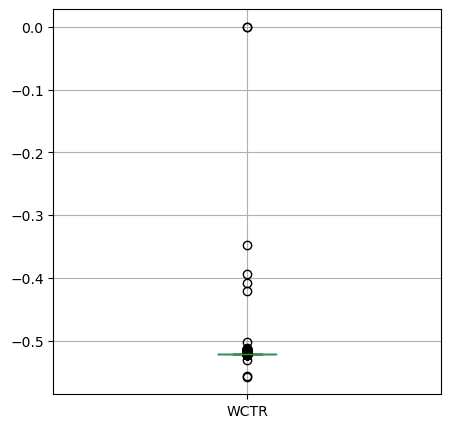

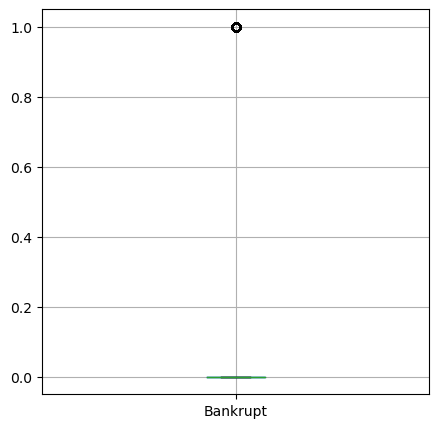

In [ ]:
for x in exam_log:
    exam_log.boxplot(figsize=(5,5),column=x)
    plt.show()
# в результате логарифмирования по большинству переменных уменьшился разброс значений

# 2. Разделение выборки на тестовую и контрольную

In [ ]:
y = exam_log['Bankrupt']
X = exam_log[['ROA', 'ROE', 'CurrRatio', 'CashTA', 'FATF', 'ICR', 'LE', 'InvTurnRate',
       'ART', 'WCTR']]

In [ ]:
# Для разделения выборки ставим границу в 80%
border =round(exam_log['Bankrupt'].count() * 0.8)
X_train = X.iloc[:border]
y_train = y.iloc[:border]

X_test = X.iloc[border:]
y_test = y.iloc[border:]

# 3. Логит модель

In [ ]:
logit_model = sm.Logit(y_train, X_train).fit()
print(logit_model.summary())
# Псевдо R^2 равен 0.1649, то есть модель объясняет 16,49% выборки
# LLR p-value равен 0.000, то есть модель значима

Optimization terminated successfully.
         Current function value: 0.110108
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                          Logit   Df Residuals:                     5445
Method:                           MLE   Df Model:                            9
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                  0.2941
Time:                        13:03:37   Log-Likelihood:                -600.64
converged:                       True   LL-Null:                       -850.93
Covariance Type:            nonrobust   LLR p-value:                4.301e-102
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ROA            -6.8248      0.571    -11.942      0.000      -7.945      -5.705
ROE            14.0747    

In [ ]:
# Оценим качество
y_probas_train = logit_model.predict(X_train)
y_probas_test =logit_model.predict(X_test)

# 4. Пробит модель

In [ ]:
probit_model = sm.Probit(y_train, X_train).fit()
print(probit_model.summary())
# Псевдо R^2 равен 0.1642, то есть модель объясняет 16,42% выборки
# LLR p-value равен 0.000, то есть модель значима

# 5. Модель дерева

In [ ]:
tree_model = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
plt.figure(figsize=(20, 10))
fn = ['age', '30-59_log', 'DebtRatio', '90_log', '60-89_log', 'NumberOfDependents','MI_log']
cn =['good loan','bad loan']
tree.plot_tree(tree_model,
               fontsize=8,
               feature_names = fn,
               class_names=cn,
               filled = True)
plt.show()
# Конечные результаты показывают, что большая часть заемщиков (31087 чел. или 88,8%) относятся к группе хороших заемщиков